In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from typing import Tuple, List
from reg_stat_inference import treat_regression_model

# Dataset exploration

In [2]:
diabetes = pd.read_csv('diabetes.csv') 
diabetes.shape

(768, 9)

In [3]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
round(diabetes.drop('Outcome',axis=1).describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00


In [6]:
diabetes.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# EDA

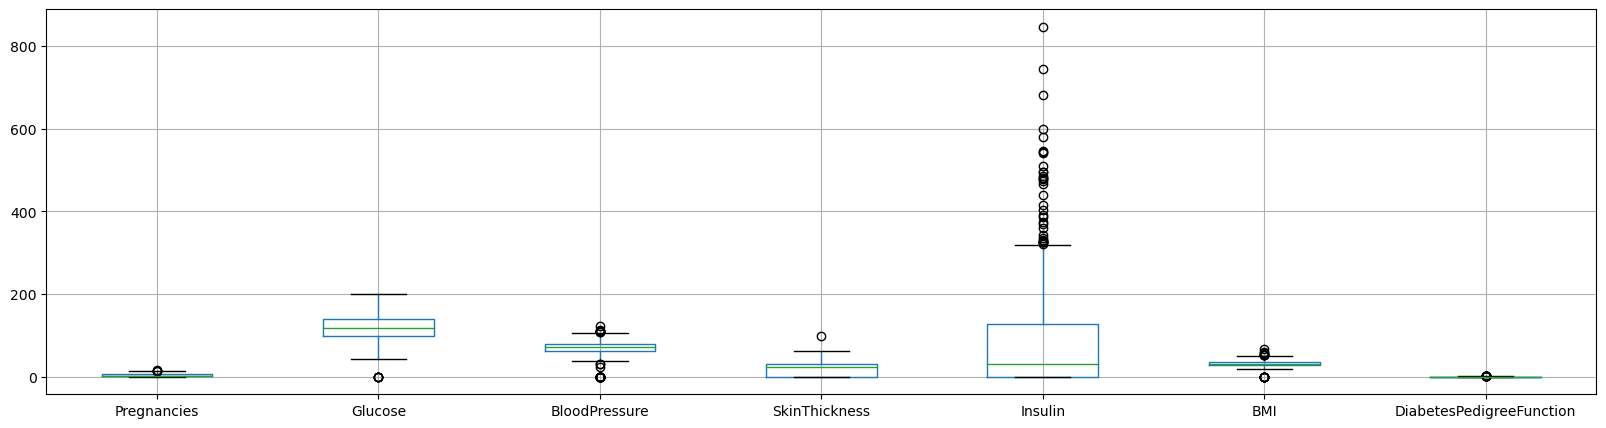

In [9]:
diabetes.iloc[:,0:7].boxplot(figsize = (20,5)) 
plt.show()

# Logistic regression for one variable - Glucose

In [10]:
import statsmodels.formula.api as sm 
 
glm = sm.logit('Outcome~Glucose',data=diabetes).fit()

Optimization terminated successfully.
         Current function value: 0.526510
         Iterations 6


In [11]:
print(glm.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Sat, 26 Aug 2023   Pseudo R-squ.:                  0.1860
Time:                        18:01:56   Log-Likelihood:                -404.36
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 4.418e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3501      0.421    -12.713      0.000      -6.175      -4.525
Glucose        0.0379      0.003     11.647      0.000       0.031       0.044


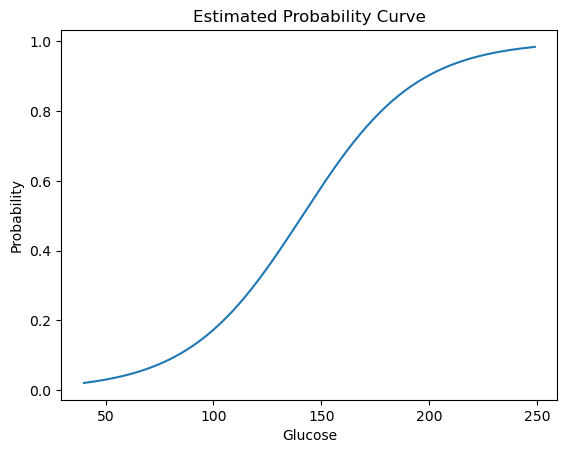

In [12]:
newvalue = np.arange(40,250) 
newdata = pd.DataFrame(newvalue,columns=['Glucose']) 
predicted_values = glm.predict(newdata) 
sns.lineplot(x = newdata.Glucose, y = predicted_values)
plt.title('Estimated Probability Curve') 
plt.ylabel('Probability') 
plt.show()

# Multiple regression

In [13]:
c = diabetes.columns.to_list()
c.remove('Outcome')
independent = ' + '.join(c)
glm2 = sm.logit(f'Outcome ~ {independent}',data=diabetes).fit()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


In [14]:
print(glm2.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Sat, 26 Aug 2023   Pseudo R-squ.:                  0.2718
Time:                        18:01:57   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.

# Final model after multicollinearity and p-value treatment

In [37]:
glm3 = treat_regression_model(diabetes[c], diabetes['Outcome'], reg_type='logit', threshhold_vif=15, threshold_pval=0.15)

In [38]:
print(glm3.model.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                            5
Date:                Sat, 26 Aug 2023   Pseudo R-squ.:                  0.2275
Time:                        18:03:57   Log-Likelihood:                -383.75
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 7.734e-47
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.4776      0.502    -12.893      0.000      -7.462      -5.493
Pregnancies                  0.1296      0.026      4.911      0.000       0.078       0.

In [18]:
glm3.metric_list

['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction']

# Model evaluation

Area Under the Curve 0.6804


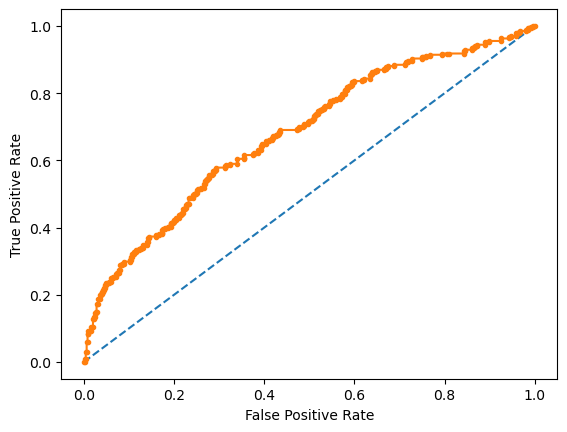

In [19]:
from sklearn import metrics 
from statsmodels.api import add_constant
fpr, tpr, thresholds = metrics.roc_curve(diabetes.Outcome, glm3.model.predict(add_constant(diabetes[glm3.metric_list]))) 
plt.plot([0, 1], [0, 1], linestyle='--') 
print('Area Under the Curve', round(metrics.auc(fpr,tpr),4)) 
plt.plot(fpr, tpr, marker='.') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

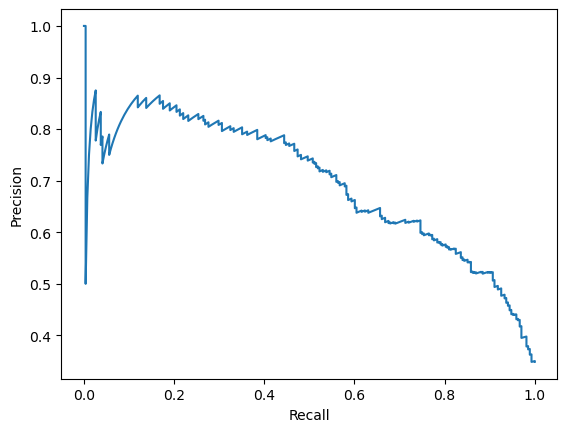

In [39]:
prec, recal,_ = metrics.precision_recall_curve(diabetes.Outcome, glm3.model.predict(add_constant(diabetes[glm3.metric_list]))) 
plt.plot(recal, prec) 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.show()

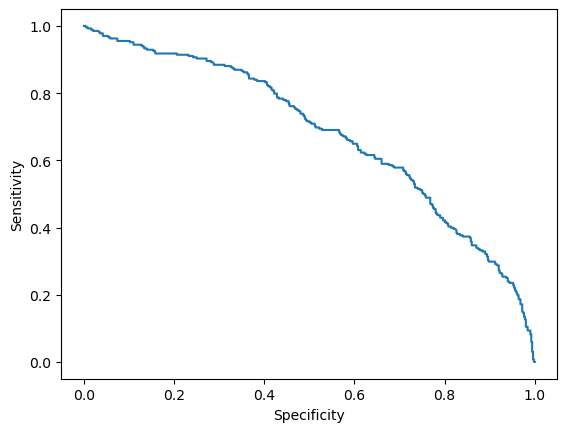

In [40]:
#Sensitivity vs Specificity Curve 
Sensitivity = tpr 
Specificity = 1 - fpr 
plt.plot(Specificity,Sensitivity) 
plt.xlabel('Specificity') 
plt.ylabel('Sensitivity') 
plt.show()